# Using APIs to Get Data From the Internet


**API** means Application Programmer Interface

An API is a set of instructions that describe how computers can interact with each other to request and receive information.

Some important questions we will ask that help us discover APIs is below.

|Question | In technical terms |
|:---------|:--------------------|
|Where is my data? | What is the domain? |
|How do I learn what data is available?| Where is the documentation? |
|How do I request specific data?| How do I formulate a URL for a specific purpose? |
|How do I interpret the data?| What is the structure and format of the output?|



**Let's walk through an example in the browser**

PlaceKitten!

In a browser, go to http://www.placekitten.com

|In technical terms | PlaceKitten |
|:---------|:--------------------|
|What is the domain? | http://www.placekitten.com |
|Where is the documentation?| The documentation is on the home page. |
|How do I formulate a URL for a specific purpose? | You put it in the url like http://www.placekitten/width/height |
|What is the structure and format of the output?| It's an image! |

# Accessing placekitten in python

We're going to use a special library called <code>requests</code>

In [1]:
from IPython.display import display, Image  # This line lets you display images. We'll use that in a bit.

# This line lets you use python to download data from the web.
import requests

In [2]:
# Get a 200 by 300 image from placekitten.
r = requests.get('http://www.placekitten.com/200/300')

In [3]:
# Look at the status code
r.status_code

200

In [4]:
# print the content
r.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 65\n\xff\xdb\x00C\x00\x0b\x08\x08\n\x08\x07\x0b\n\t\n\r\x0c\x0b\r\x11\x1c\x12\x11\x0f\x0f\x11"\x19\x1a\x14\x1c)$+*($\'\'-2@7-0=0\'\'8L9=CEHIH+6OUNFT@GHE\xff\xdb\x00C\x01\x0c\r\r\x11\x0f\x11!\x12\x12!E.\'.EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE\xff\xc0\x00\x11\x08\x01,\x00\xc8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc

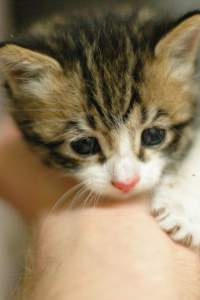

In [5]:
# Use the Image function to display the image
display(Image(r.content))

### Exercise 1

Write a function that takes in the width and height and prints an image

Enter width:300
Enter height:300
width:300
height:300
address:http://www.placekitten.com/300/300


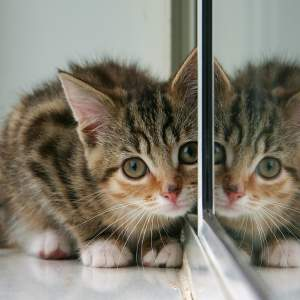

In [15]:
# Use input to request width/height and print an image
def p_image():
    a = input("Enter width:")
    b = input("Enter height:")
    print("width:"+str(a))
    print("height:"+str(b))
    address = "http://www.placekitten.com/"+ str(a) +"/" + str(b)
    print("address:"+address)
    r = requests.get(address)
    display(Image(r.content))

p_image()

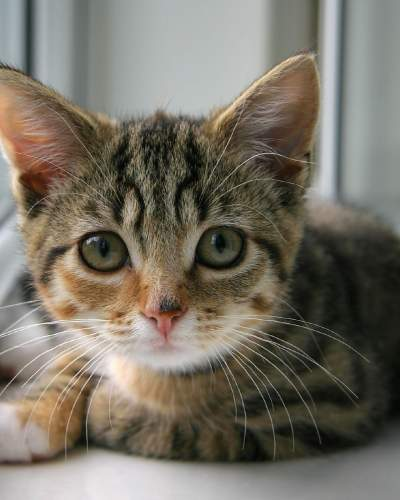

In [5]:
def p_image(width,height):
    try:
        int(width)
        int(height)
    except(SyntaxError. ValueError):
        print("Please enter the number in digits")
    r = requests.get(f'http://www.placekitten.com/{width}/{height}')
    r.status_code
    if r.status_code != 200:
        print('404 Error')
    return(display(Image(r.content)))

p_image(400,500)

### Exercise 2

Can you write a loop to show several images?


address:http://www.placekitten.com/100/100


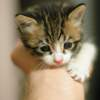

address:http://www.placekitten.com/100/150


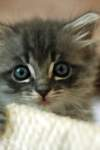

address:http://www.placekitten.com/100/300


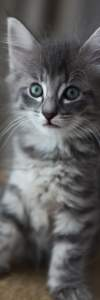

address:http://www.placekitten.com/200/100


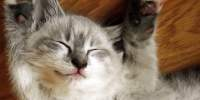

address:http://www.placekitten.com/200/150


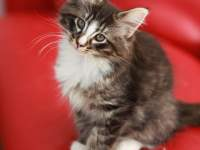

address:http://www.placekitten.com/200/300


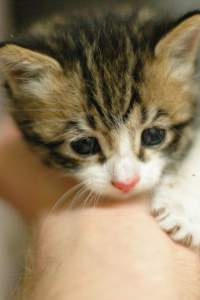

address:http://www.placekitten.com/300/100


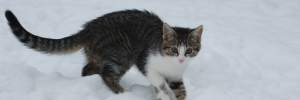

address:http://www.placekitten.com/300/150


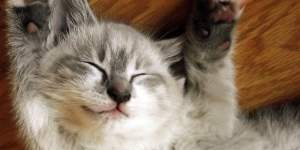

address:http://www.placekitten.com/300/300


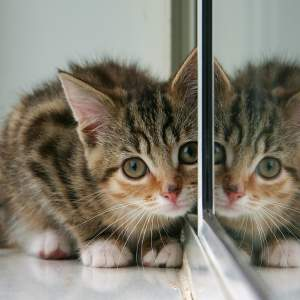

In [18]:
# Write a loop that shows multiple images
width = [100,200,300]
height = [100,150,300]

for w in width:
    for h in height:
        address = "http://www.placekitten.com/"+ str(w) +"/" + str(h)
        print("address:"+address)
        r = requests.get(address)
        display(Image(r.content))

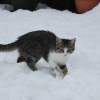

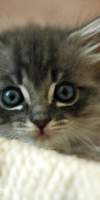

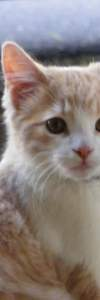

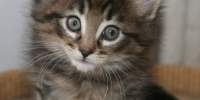

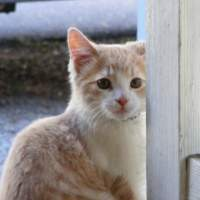

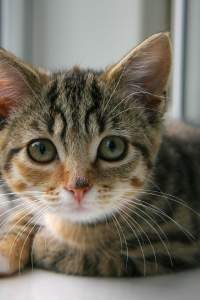

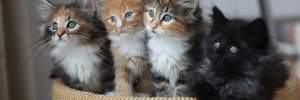

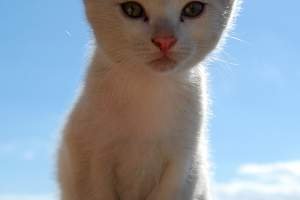

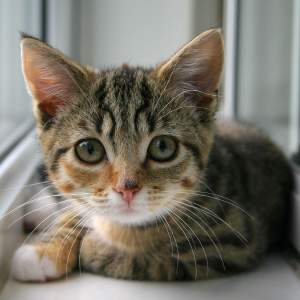

In [9]:
for w in [100,200,300]:
    for h in [100,200,300]:
        p_image(w,h)

# Example 2: Getting World Times

This example introduces a slightly more complicated API. It also introduces **JSON** which is a very common data format.

Our API is at http://worldtimeapi.org/

In [50]:
# Download list of time zones
r = requests.get("http://worldtimeapi.org/api/timezone")
print(r.content)

b'["Africa/Abidjan","Africa/Accra","Africa/Algiers","Africa/Bissau","Africa/Cairo","Africa/Casablanca","Africa/Ceuta","Africa/El_Aaiun","Africa/Johannesburg","Africa/Juba","Africa/Khartoum","Africa/Lagos","Africa/Maputo","Africa/Monrovia","Africa/Nairobi","Africa/Ndjamena","Africa/Sao_Tome","Africa/Tripoli","Africa/Tunis","Africa/Windhoek","America/Adak","America/Anchorage","America/Araguaina","America/Argentina/Buenos_Aires","America/Argentina/Catamarca","America/Argentina/Cordoba","America/Argentina/Jujuy","America/Argentina/La_Rioja","America/Argentina/Mendoza","America/Argentina/Rio_Gallegos","America/Argentina/Salta","America/Argentina/San_Juan","America/Argentina/San_Luis","America/Argentina/Tucuman","America/Argentina/Ushuaia","America/Asuncion","America/Atikokan","America/Bahia","America/Bahia_Banderas","America/Barbados","America/Belem","America/Belize","America/Blanc-Sablon","America/Boa_Vista","America/Bogota","America/Boise","America/Cambridge_Bay","America/Campo_Grande","A

### Exercise 3

Use the .json() function to get the response converted to a dictionary or list

In [27]:
# Use the .json() function to get the response converted to a dictionary or list
# What did it return?
import json

In [8]:
import json
r = requests.get("http://worldtimeapi.org/api/timezone")
son_data = r.json()
print(son_data)
type(son_data)

['Africa/Abidjan', 'Africa/Accra', 'Africa/Algiers', 'Africa/Bissau', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/El_Aaiun', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Khartoum', 'Africa/Lagos', 'Africa/Maputo', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'America/Araguaina', 'America/Argentina/Buenos_Aires', 'America/Argentina/Catamarca', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/La_Rioja', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Salta', 'America/Argentina/San_Juan', 'America/Argentina/San_Luis', 'America/Argentina/Tucuman', 'America/Argentina/Ushuaia', 'America/Asuncion', 'America/Atikokan', 'America/Bahia', 'America/Bahia_Banderas', 'America/Barbados', 'America/Belem', 'America/Belize', 'America/Blanc-Sablon', 'America/Boa_Vista', 'America/Bogota', 'America/Boise', 'Amer

list

### Exercise 4

Get the time for your time zone

In [15]:
def timezone(a,l,c):
    r = requests.get(f'http://worldtimeapi.org/api/timezone/{a}/{l}/{c}')
    son_data=r.json()
    print("The time for your time zone is: " + son_data['datetime'])

timezone('America','Indiana','Indianapolis')

The time for your time zone is: 2021-05-26T13:56:46.530077-04:00


### Exercise 5

Get the time for your IP address

In [18]:
# Get the time for your IP address
address = "http://worldtimeapi.org/api/ip"
r = requests.get(address)
if r.status_code == 200:
    son_data=r.json()
else:
    pass

print("The time for your current IP is: " + son_data['datetime'])

The time for your current IP is: 2021-05-26T14:08:48.125339-04:00


# Example 3: Getting Wikipedia pages

Wikipedia also has an open API, and I want to use it to show one other tip for using the `requests` library; many APIs will take in a set of parameters, which you can pass as a parameter dictionary.

The documentation for the very extensive API is [here](https://www.mediawiki.org/wiki/API:Main_page). Many of the operations require you to authenticate (which we will cover next), but some things, like getting the content of a page, do not.

For example, the following code gets the recent changes to Wikipedia.

In [27]:
import requests

endpt = 'https://en.wikipedia.org/w/api.php'


def get_last_pages_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n}
    r = requests.get(endpt, params)
    #print(r.json()['query']['recentchanges'])
    result = []
    content = r.json()['query']['recentchanges']
    for r in content:
        result.append(r['title'])
    return result

In [143]:
get_last_pages_changed(20)

['Fosters Freeze',
 'Renga',
 'Two-state solution',
 'List of state leaders in the 21st century',
 'The Voices of East Harlem',
 'Diving in the Maldives',
 'List of Hong Kong films of 1973',
 'Gwar',
 'Florida State Fair',
 'The Voice of the Desert',
 'Jan Schakowsky',
 'Frame Arms Girl',
 'Frederick Kovert',
 'Belcoo',
 'Rod Ponton',
 'Susan Whitrowe',
 'Varvara Flink',
 'The Vocaleers',
 'Mortar (weapon)',
 'Nelson Agholor']

## Exercise 6

Review the documentation (and Google) to see if you can figure out how to get a list of all of the people who have ever edited the most recently edited Wikipedia page.

In [31]:
import requests

endpt = 'https://en.wikipedia.org/w/api.php'


def get_people_edited(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n}
    r1 = requests.get(endpt, params)
    #print(r.json()['query']['recentchanges'])
    result = []
    content = r1.json()['query']['recentchanges']
    for r1 in content:
        t = r1['title']
        result.append(r1['title'])
        print(t) 
        params = {
                "action": "query",    
                "titles": t,
                "prop": "revisions",
                "rvprop": "user",
                "formatversion": "2",
                "format": "json"}
        r2=requests.get('https://en.wikipedia.org/w/api.php', params)
        data=r2.json()
        pages = data["query"]["pages"]
        for page in pages:
            print(page["revisions"])

In [32]:
get_people_edited(10)

Soup2Nuts
[{'user': '2603:6080:A740:C00:955E:9477:C130:5252', 'anon': True}]
Powder diffraction
[{'user': 'WikiCleanerBot'}]
2019–20 Bundesliga
[{'user': 'S.A. Julio'}]
Amritha Aiyer
[{'user': 'Sathish Kathiravan'}]
Abdul Rahim Khan-i-Khanan
[{'user': 'MarnetteD'}]
Old Norse
[{'user': 'JohnBretheren'}]
Ika South
[{'user': 'Nnadigoodluck'}]
Hysteria (Def Leppard album)
[{'user': 'Dhoffryn'}]
List of disasters in the United States by death toll
[{'user': '76.111.114.96', 'anon': True}]
Fiame Naomi Mataʻafa
[{'user': 'Therequiembellishere'}]


In [22]:
import requests

endpt = 'https://en.wikipedia.org/w/api.php'

def get_last_users_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n,
          "rcprop": "user"
             }
    r = requests.get(endpt, params)
    result = []
    content = r.json()['query']['recentchanges']
    for r in content:
        result.append(r['user'])
    return result

get_last_users_changed(10)

['2401:E180:88A0:981E:D2:BA61:6E26:44C0',
 'Simeon',
 'SoulSurvivor97',
 '100.11.207.98',
 'WikiCleanerBot',
 'Jevonjgoodheart1',
 'John Maynard Friedman',
 '2603:3020:23F1:0:5D33:A4BE:E9A8:A732',
 '2.179.146.214',
 'Wxmdrgn']

In [33]:
page = get_last_pages_changed(1)

def get_editors():
    parm ={'action':'query',
    'format':'json',
    'prop':'contributors',
    'titles':page[0]} # page links back to the defined most recently edited page as above.

    r = requests.get(endpt,parm)
    all_content = r.json()['query']['pages']
    page_id=list(all_content.keys())[0]
    contr = all_content[page_id]["contributors"] # narrowed to just the contributor list with user ids and names

    #print(contr)
    editors = []
    for item in contr: # get each dictionary pair out of the list, then need to grab the value of the key name from the dictionaries
        editors.append(item["name"])
    #print(editors)

    return print(f"The most recent editors of the page {page} are {editors[:]}.") #is there a way to remove the [] from the printout? 
get_editors() 

The most recent editors of the page ['Otto Thiel'] are ['Lugnuts', 'KolbertBot', 'Joeykai', 'Rjwilmsi', 'Addbot', 'KasparBot', 'S.A. Julio', 'RjwilmsiBot', 'Waacstats', 'GreenC bot'].


# Example 4: Intro to Twitter API

In order to use the Twitter API, you need to do two things:

1. Install tweepy. This is a python library designed to make it easier to use the API (rather than using `requests` directly. I made [this video](https://www.youtube.com/watch?v=TASX3evcgG4) to walk you through how to install tweepy in Anaconda.

2. To use the Twitter API, you need to be authenticated, and so you need a developer account. [This page](https://wiki.communitydata.science/Intro_to_Programming_and_Data_Science_(Summer_2020)/Twitter_authentication_setup) explains how to get a developer account.

Once you have your keys, you should create a file called `twitter_authentication.py` in the same directory as this file. It should contain the following four lines (replace the fake strings below with the corresponding keys from your twitter account):

```
CONSUMER_KEY = 'zFxMGdKmbo4e72X8Fi2FYr54v'
CONSUMER_SECRET = 'SetuIC9x6zPQXPZrc9cKTph7AMSngUZSf745GXT0QZTrnWeELQ'
ACCESS_TOKEN = '16614440-V09URsqNfP0V0JYZCD65NhpJAcPZ6Wb9A5ar9JrUT'
ACCESS_TOKEN_SECRET = 'oxVSzC1OjXOVVYrBvGyy6XKKe772Jdvvw6Opb3bSLdIb'
```

In general, it is a good practice to keep your keys (which should be secret) separate from your code, which you can share. In this case, we put them in a different file and then import them.

The following code loads the tweepy library and imports these keys from the `twitter_authentication.py` file, and then prepares to "log in" to your account for the Twitter API.

In [37]:
import tweepy

from twitter_authentication import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# We then create an api object, based on the auth object created with your credentials
api = tweepy.API(auth, wait_on_rate_limit=True)

## Rate Limiting

You will quickly learn that the Twitter API is "rate limited". This means that they will only let each account make a certain number of calls to their API in a given time period. The default rate is quite low - many calls only allow 15 calls per 15 minutes.

You may notice above that we had the code:
```
api = tweepy.API(auth, wait_on_rate_limit=True)
```
the `wait_on_rate_limit=True` tells your code to wait for 15 minutes if it gets back a message that you've exceeded a rate limit. This can get annoying when debugging, so be careful with how often you try things - sometimes it makes sense, for example, to try to get a small amount of data that only takes on call and make sure that your code works before trying to get all of the data.

## Timeline

This first example is just to make sure it's working. It should print out the last 100 tweets from your timeline.

In [134]:
# Grab the last 100 tweets
public_tweets = api.home_timeline(count=100)

# And print the text from them
for tweet in public_tweets:
    print(tweet.text)


Data published today in @CDCMMWR provide information on #COVID19 vaccine breakthrough cases reported to CDC between… https://t.co/JFASzwTxAT
It takes 2 weeks after #COVID19 vaccination to be fully vaccinated.

As of May 24, 2021, more than 163 million peop… https://t.co/pHid3vn7Wl
Follow CDC’s Steps for Healthy Swimming to protect yourself and those you care about from illness at the pool and a… https://t.co/SpYpB0VD1A
May is Mental Health Awareness Month. Check out this new American Sign Language (#ASL) video for helpful tips on ma… https://t.co/9tWhWp4zCq
#HCPs: In this #HowIRecommend video, watch as neonatologist Dr. Shetal Shah describes how he fosters support for va… https://t.co/v5vChaksue
Everyone 12 years and older is now eligible to get a #COVID19 vaccine.  

Widespread vaccination is a critical tool… https://t.co/NauZFX2WQ1
Find the latest #COVID19 health equity case studies, videos, webinars, and research publications to help you and yo… https://t.co/JWeNgH1l6W
Join today’s 

Each of these `tweet` objects contains lots of additional information. This shows all of the metadata available for the last one we looked at.

In [135]:
tweet._json

{'created_at': 'Wed May 12 19:02:00 +0000 2021',
 'id': 1392555676212342785,
 'id_str': '1392555676212342785',
 'text': 'We know graduation is a special time for many families, and that #COVID19 presents challenges to celebrating this m… https://t.co/v8ncFV6tX5',
 'truncated': True,
 'entities': {'hashtags': [{'text': 'COVID19', 'indices': [65, 73]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/v8ncFV6tX5',
    'expanded_url': 'https://twitter.com/i/web/status/1392555676212342785',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [117, 140]}]},
 'source': '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 146569971,
  'id_str': '146569971',
  'name': 'CDC',
  'screen_name': 'CDCgov',
  'location': 'Atlanta, GA',
  'description': "CDC'

You can try to change the `count` argument above, and you'll quickly learn that if you raise it over 200, you will still only get 200 tweets. If you want to print more than 200 tweets, you may need to use a [cursor](http://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html).

This is basically tweepy's clever way of breaking what you want to do into multiple calls to the API.

For example, this call will get 350 tweets. The `count` argument (optional) says how many tweets to get per call, and the argument in `.items()` is how many to get in total.

In [136]:
for tweet in tweepy.Cursor(api.home_timeline, count = 175).items(350):
    print(tweet.text)

Data published today in @CDCMMWR provide information on #COVID19 vaccine breakthrough cases reported to CDC between… https://t.co/JFASzwTxAT
It takes 2 weeks after #COVID19 vaccination to be fully vaccinated.

As of May 24, 2021, more than 163 million peop… https://t.co/pHid3vn7Wl
Follow CDC’s Steps for Healthy Swimming to protect yourself and those you care about from illness at the pool and a… https://t.co/SpYpB0VD1A
May is Mental Health Awareness Month. Check out this new American Sign Language (#ASL) video for helpful tips on ma… https://t.co/9tWhWp4zCq
#HCPs: In this #HowIRecommend video, watch as neonatologist Dr. Shetal Shah describes how he fosters support for va… https://t.co/v5vChaksue
Everyone 12 years and older is now eligible to get a #COVID19 vaccine.  

Widespread vaccination is a critical tool… https://t.co/NauZFX2WQ1
Find the latest #COVID19 health equity case studies, videos, webinars, and research publications to help you and yo… https://t.co/JWeNgH1l6W
Join today’s 

Congratulations to CDC’s Principal Deputy Director Anne Schuchat, MD (RADM, USPHS, RET) on being named a finalist i… https://t.co/tT8UJXMs3u
School Administrators: Employees can reduce the risk of getting #COVID19 while preparing or serving meals. Clean fr… https://t.co/1V5Y9fwX1p
New @JAMA_current study reviews US cases of CVST with thrombocytopenia after J&amp;J #COVID19 vaccination. CDC recommen… https://t.co/p9W8XcoXry
#HCPs: Are your patients asking about the Johnson &amp; Johnson #COVID19 vaccine?

New tools are available to help you… https://t.co/mAs8VRX5qm
.@ONDCP &amp; @CDCInjury #DrugFreeCommunity coalitions help prevent youth substance use by implementing evidence-based… https://t.co/dTgUfeKY42
Since life has been anything but routine lately, here’s a friendly reminder to make sure that routinely recommended… https://t.co/wzPuOyHQiM
It’s #NationalPetWeek! 🐱🐶🐦 During the pandemic, pets have given us comfort and companionship. Take steps to keep yo… https://t.co/JnPTwU1SX6
Tod

## Followers

You can also get information about a user, such as who their followers are.

Here's information about me and some of my followers.

In [137]:
user = api.get_user('jdfoote')

print(user.screen_name + " has " + str(user.followers_count) + " followers.")

print("They include these 100 people:")

for follower in user.followers(count=100):
    print(follower.screen_name)

jdfoote has 795 followers.
They include these 100 people:


TweepError: Not authorized.

Here is what that user object looks like for my user

In [7]:
user._json

{'id': 16614440,
 'id_str': '16614440',
 'name': 'Jeremy Foote',
 'screen_name': 'jdfoote',
 'location': 'West Lafayette, IN, USA',
 'profile_location': None,
 'description': 'Assistant Prof of Communication at #Purdue. Computational social scientist: online organizations, collective decision making. @comdatasci member. Dad.',
 'url': 'https://t.co/vovAhYeNah',
 'entities': {'url': {'urls': [{'url': 'https://t.co/vovAhYeNah',
     'expanded_url': 'http://jeremydfoote.com',
     'display_url': 'jeremydfoote.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': True,
 'followers_count': 796,
 'friends_count': 1041,
 'listed_count': 22,
 'created_at': 'Mon Oct 06 14:43:31 +0000 2008',
 'favourites_count': 5259,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 2836,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'p

And here's the user object for one of my followers, which is nearly identical.

In [8]:
follower._json

NameError: name 'follower' is not defined

Note that 200 is the maximum number of followers that you can get at one time. If you want to get information about all of a user's followers, you will need to use a cursor. If you are getting many followers, you will almost certainly hit rate limits.

In [9]:
f = []
for follower in tweepy.Cursor(api.followers, screen_name='jdfoote', count=200).items():
    #print(follower.screen_name)
    f.append(follower.screen_name)

TweepError: Not authorized.

In [10]:
print(f)

[]


## Searching

For most of your research, you may be interested in how people are talking about a given topic. There are two main ways to do this.

The first is the search API ([Official Twitter info on the Search API](https://developer.twitter.com/en/docs/tweets/search/overview)). We only have access to "[Standard Search](https://developer.twitter.com/en/docs/tweets/search/overview/standard)", the most limited of Twitter Search API options, which is limited to the last 7 days.


[This page](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets) is the documentation for Standard Search and has some helpful intel about modifying the parameters.

Below is a simple example that gets the last 20 tweets about data science.

In [155]:
public_tweets = api.search('data science', count=20)

for tweet in public_tweets:
    print(tweet.user.screen_name + "\t" + str(tweet.created_at) + "\t" + tweet.text)

RebelSkeptical	2021-05-25 18:28:58	RT @RealJoelSmalley: Had the privilege of reading a 187-slide analysis of vaccine-associated COVID mortality last night. The data analysis…
pat_data_man	2021-05-25 18:28:31	@Jannico71 @Icarlossolrac @Doc_Box @Bos_M https://t.co/qqXBChvyhq
Betere en actuelere onderzoeken dan deze zijn er momenteel niet.
_ACDennis	2021-05-25 18:28:31	RT @sarambsimon: .@TheAtlantic picked up our @COVID19Tracking wrap-up, a summary of the systems that shaped the data. This post (and frankl…
DocJQueen	2021-05-25 18:28:23	I’m speaking at the #SorensonImpactSummit May 25-27. Session topics include developing inclusive solutions in impac… https://t.co/2UKv7Ke84w
raohackr	2021-05-25 18:28:21	@villi It’s a mix of a business &amp; science problem now - what L3 and easy city L4 can you launch and scale in to get… https://t.co/uA4Y6PJpZt
OtterbeinSSCD	2021-05-25 18:27:59	Data Science Career Panel - June 11, 2021 at 3-4pm ET
This event is for students interested in learning more ab

Note that many of these results are truncated. If you want the full tweet, you actually have to modify the call a little bit, like so.

In [156]:
public_tweets = api.search('"data science"', count=20, tweet_mode='extended')

for tweet in public_tweets:
    print(tweet.user.screen_name + "\t" + str(tweet.created_at) + "\t" + tweet.full_text)

DocJQueen	2021-05-25 18:28:23	I’m speaking at the #SorensonImpactSummit May 25-27. Session topics include developing inclusive solutions in impact investing, entrepreneurship, higher ed, and data science. JOIN US. Registration underwritten by this year's sponsors: https://t.co/idm4HcRn6N #movemountains
OtterbeinSSCD	2021-05-25 18:27:59	Data Science Career Panel - June 11, 2021 at 3-4pm ET
This event is for students interested in learning more about exciting new data science careers, internships, and education opportunities from industry professionals, students and educators.
https://t.co/Vzxnci8wHx https://t.co/ERyXpc9RZE
bazi1107	2021-05-25 18:27:41	RT @scientificaBW: 🧡liche Einladung zum Fachkurs "Einstieg in #DataScience mit #R von Prof. Dr. Katja Wengler - taucht ein in die Welt der…
cryptofahad	2021-05-25 18:27:23	If anyone knows of any problems in #crypto/#DeFi/ #Blockchain, that can be solved using Deep Learning Algorithms/ Data Science/ or in general A.I pls let me know. 

I am

In [17]:
tweet.retweet

<bound method Status.retweet of Status(_api=<tweepy.api.API object at 0x0000017C5567C280>, _json={'created_at': 'Mon May 24 23:26:39 +0000 2021', 'id': 1396970931327848456, 'id_str': '1396970931327848456', 'full_text': "SEO seems to have eaten anything useful about building a data science strategy; what are folks liking nowadays for a high-level introduction to basic data concepts and why they're critical to success? Think data cleaning, point in time data, etc.", 'truncated': False, 'display_text_range': [0, 246], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1713902882, 'id_str': '1713902882', 'name': 'James Meickle', 'screen_name'

### Additional Search resources

* [Tweepy extended tweets documentation](http://docs.tweepy.org/en/latest/extended_tweets.html)
* [Twitter documentation for crafting queries](https://developer.twitter.com/en/docs/tweets/search/guides/standard-operators). This includes things like how to search by geography or remove retweets.

## Streaming

The other option is to "stream" tweets. Instead of looking backward, this just keeps you connected to Twitter and whenever new tweets come in, they are sent to your program. You would typicaly just keep the program running and keep writing the data that you want to an external file.

As with the search API, there are some caveats. One is that (I believe) there is no guarantee that this is all of the tweets that match. If you try to filter by very popular terms, then Twitter may give you only a sample of them.

In [18]:
class StreamListener(tweepy.StreamListener):
    def on_status(self, tweet):
        print(tweet.author.screen_name + "\t" + tweet.text)

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

l = StreamListener()
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')

keywords = ['Purdue', '"data science"']
streamer.filter(track = keywords)

mikewichter	RT @AssemblyCall: What a matchup. A combined 6 national titles between the two programs.
GopherCrew	My Updated Preseason 2021-2022 Big Ten CBB Rankings:

1. Michigan
2. Purdue
3. Ohio State
4. Maryland
5. Michigan S… https://t.co/5Rsdi3Q2UM


KeyboardInterrupt: 

# Exercises


7. Use the streaming API to produce a list of 1000 tweets about a topic.
2. From that list of 1000 tweets, eliminate retweets.
4. For each original tweet, create a dictionary with the number of times you see it retweeted in your dataset.
5. Get a list of the URLs in your dataset
3. Now, see if you can figure out how to eliminate retweets in the query instead.
7. Get the last 50 tweets from West Lafayette, using the search API. (Hint - look up the geocode information [here](https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets)).
8. Alter the streaming algorithm to include a "locations" filter to get tweets from New York City. You need to use the order sw_lng, sw_lat, ne_lng, ne_lat for the four coordinates instead of a radius as in the search API.

### BONUS Questions
1. For each of your followers, get *their* followers (investigate time.sleep to throttle your computation)
2. Identify the follower you have that also follows the most of your followers.
3. How many users follow you but none of your followers?

In [28]:
#Exercise 7

tweet_list=[]
class MyStreamListener(tweepy.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open("tweet.txt","w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<1000:
            return True
        else:
            return False
        self.file.close()

l = MyStreamListener()
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')

keywords = ['Covid', 'travel']
streamer.filter(track = keywords)

In [34]:
x=3

def add_nums(x,y):
    return x+y

add_nums(2,4)

6

In [35]:
x

3

In [ ]:
tweets = []
    
class StreamListener(tweepy.StreamListener):
    counter = 0
    num_tweets = 1000
    
    def on_status(self, tweet):
        tweets.append(tweet)
        self.counter += 1
        if self.counter == self.num_tweets:
            return False

        return True

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

l = StreamListener()
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')

keywords = ['happy']
streamer.filter(track = keywords)

In [ ]:
class StreamListener(tweepy.StreamListener):

    def __init__(self, num_tweets):
        self.counter = 0
        self.num_tweets = num_tweets
        self.tweets = []
        super().__init__()
    
    def on_status(self, tweet):
        self.tweets.append(tweet)
        self.counter += 1
        if self.counter >= self.num_tweets:
            return False

        return True

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

l = StreamListener(200)
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')

keywords = ['happy']
streamer.filter(track = keywords)

for tweet in l.tweets:
    print(tweet.text)

In [169]:
#Exercise 8

tweets_data_path='tweet.txt'
tweets_data=[]
tweets_file=open(tweets_data_path,"r")
#read in tweets and store on list
for line in tweets_file:
    tweet=json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()
print(len(tweets_data))

no_retweet=[]
for t in tweets_data:
    if not hasattr(t, "retweeted_status") and 'RT @' not in t['text']:
        no_retweet.append(t)
print(len(no_retweet))
print(no_retweet[0])

1000
269
{'created_at': 'Tue May 25 00:27:56 +0000 2021', 'id': 1396986355540955138, 'id_str': '1396986355540955138', 'text': '@MAJORBITCH1776 @PresidentBillbo Correct..it’s designed to artificially insult your immune system to produce a prod… https://t.co/kBAw9a6EqQ', 'display_text_range': [33, 140], 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': True, 'in_reply_to_status_id': 1396985435079991302, 'in_reply_to_status_id_str': '1396985435079991302', 'in_reply_to_user_id': 1343300183824740358, 'in_reply_to_user_id_str': '1343300183824740358', 'in_reply_to_screen_name': 'MAJORBITCH1776', 'user': {'id': 1653804902, 'id_str': '1653804902', 'name': 'Doug Still', 'screen_name': 'DougShootsStr8', 'location': 'Pennsylvania, USA', 'url': None, 'description': 'A Realist, An Optimist, A Truth Speaker and A Very Curious Observer. 🇺🇸', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 3236, 'friends_cou

In [42]:
public_tweets = tweepy.Cursor(api.search, '"covid" -filter:retweets',count= 200, tweet_mode = 'extended').items(1000)

no_retweet=[]
for t in public_tweets:
    if not t.retweeted and 'RT @' not in t.full_text: #can take not t.retweeted out bcs we definied above!
        no_retweet.append(t)
print(len(no_retweet))
print(no_retweet[0])

1000
Status(_api=<tweepy.api.API object at 0x000001CFA70D9F70>, _json={'created_at': 'Wed May 26 18:58:40 +0000 2021', 'id': 1397628267830693894, 'id_str': '1397628267830693894', 'full_text': '@NilsonGSJunior @da_nilosp @BolsonaroSP Isso q vc fez é conhecido como enganação, usurpador e por aí vai. P se fazer uma leitura corporal de qualquer pessoa deve ter no MÍNIMO estudado algum tipo de técnica, mas esperar o q de um babão q acredita em kit gay, kit covid e mamadeira de piroca.', 'truncated': False, 'display_text_range': [40, 291], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'NilsonGSJunior', 'name': 'Nilson G S Junior', 'id': 117068355, 'id_str': '117068355', 'indices': [0, 15]}, {'screen_name': 'da_nilosp', 'name': 'Danilo Moreira', 'id': 787048075340681216, 'id_str': '787048075340681216', 'indices': [16, 26]}, {'screen_name': 'BolsonaroSP', 'name': 'Eduardo Bolsonaro🇧🇷', 'id': 74756085, 'id_str': '74756085', 'indices': [27, 39]}], 'urls': []}, 'me

In [170]:
#Exercise 9
tweet_dict = {}

for rt in no_retweet:
    for t in tweets_data:
        if rt['text'] in t['text']:
            tweet_dict[rt['text']] = tweet_dict.get(rt['text'],0) + 1

print(len(tweet_dict))
print(tweet_dict)

269
{'@MAJORBITCH1776 @PresidentBillbo Correct..it’s designed to artificially insult your immune system to produce a prod… https://t.co/kBAw9a6EqQ': 1, "@thehill Humans can't create viruses . Dummy. Covid started from Wuhan market or at the most maybe they were doing… https://t.co/dwOZGIaYRI": 1, '@jairamthakurbjp The covid cases in Himachal Pradesh in the last one week have come down drastically and now curfew… https://t.co/ub8JabGHJD': 1, '#FRONTPAGE: State to bear #COVID treatment expenses for traveling residents and GCC citizens —… https://t.co/WyC2BWrdig': 1, '@r3bd0 Yaaaaa, seguro piensas que si te vacunas, estás inmune y pedirás el carnet verde🙄🙄🙄🙄\nSiempre se dijo que el… https://t.co/JopAuAI67y': 1, 'Full article... https://t.co/3LKD6TtDiv': 1, '@meanzjest Right.\nhttps://t.co/6qGYTNduOf': 1, '"A bike ride to an old mine, bats overhead, questions from police: exploring the theory that Covid escaped from a C… https://t.co/LtoVFsCY9h': 1, 'cara oq eu to precisando é um role com 

In [168]:
t=tweets_data[3]
t['entities']

{'hashtags': [],
 'urls': [{'url': 'https://t.co/kBAw9a6EqQ',
   'expanded_url': 'https://twitter.com/i/web/status/1396986355540955138',
   'display_url': 'twitter.com/i/web/status/1…',
   'indices': [117, 140]}],
 'user_mentions': [{'screen_name': 'MAJORBITCH1776',
   'name': 'FICKLE TURD BURGLAR 🇺🇸🙏🏼🌺🌞🌴🌊🥂',
   'id': 1343300183824740358,
   'id_str': '1343300183824740358',
   'indices': [0, 15]},
  {'screen_name': 'PresidentBillbo',
   'name': 'President-elect billbo baggins',
   'id': 834637681,
   'id_str': '834637681',
   'indices': [16, 32]}],
 'symbols': []}

In [119]:
#Exercise 10
url_list=[]
for t in tweets_data:
    if len(t['entities']['urls']) >= 1:
        url_list.append(t['entities']['urls'][0]['expanded_url'])

print(url_list[0:10])

['https://twitter.com/i/web/status/1396986355540955138', 'https://twitter.com/i/web/status/1396986356430082048', 'https://twitter.com/i/web/status/1396986357008932864', 'https://twitter.com/i/web/status/1396986357373931520', 'https://twitter.com/i/web/status/1396986358892216324', 'http://a.msn.com/01/es-xl/AAKgCm6?ocid=st', 'https://twitter.com/CarlaZambelli38/status/1396969833640644611', 'https://abcnews.go.com/International/us-adds-japan-travel-covid-19-advisory-list/story?id=77877397', 'https://twitter.com/DavidLWindt/status/1396850374343073792', 'https://twitter.com/i/web/status/1396986360486006789']


In [160]:
#Exercise 11
class StreamListener(tweepy.StreamListener):
    def on_status(self, tweet):
        if not hasattr(tweet, "retweeted_status"):  # Check if Retweet
            print(tweet.author.screen_name + "\t" + tweet.text)

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

l = StreamListener()
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')

keywords = ['Purdue', 'data science','Covid']
streamer.filter(track = keywords)

wonderway_in	idpindia: IDP in News! Mr Piyush Kumar @kpiyush2009 our Regional Director, shares insights on 'How Covid-19 is affe… https://t.co/1ouipoeYFI
tusmetros	- Global: Guía urbanística para luchar contra el Covid 19 https://t.co/aOo7qYmrKu
suyeeyh	🙏🏼
Abama2011	В Петербурге за сутки провели более 16 тысяч тестов на COVID-19 https://t.co/IzWe7aiBxs
TVNET_zinas	Daugavpilī atklāti 22 no jaunajiem inficētajiem un kopumā pēdējās divās nedēļās pilsētā reģistrēti 229 saslimušie https://t.co/lXMFFpdzRx
ambulsiva	https://t.co/7vODp9g03k
saveyourtearsxr	Enquanto tem idosos morrendo esperando vacina, enquanto tem gente com diabete, quem é vacinado? um bandido!
ThenSheAppears	Me, as a Londoner watching under 30s in Scotland and Wales becoming entitled to the COVID-19 vaccine https://t.co/F7LEz6rA7C
_dangit___	Dawg my heart stop for a second😭
FSMMAG	The @CCOHS has developed an online course to help employers and temp foreign workers in agricultural operations lea… https://t.co/pG1SYUwbGz
augie

santo_savaris	@SenadoFederal @jorginhomello PRENDAM O RENAN. COMPARANDO A CPI DA COVID COM O HOLOCAUSTO!!!! O QUE É ISSO!!!!MEU D… https://t.co/2bypvxMNCl
sergiosetia	Sin palabras👏👏👏💞
victoriabracho1	No era covid chicos salí negativo https://t.co/5tamhdDPke
corona19_stats	Israel 🇮🇱 COVID-19 current stats for Tue May 25 2021

Cases: 839,382
Deaths: 6,406
Recovered: 832,517
Active: 459
T… https://t.co/cdgHT61kIv
FDIC_OIG	ICYMI:  Owner of Wedding Planning Company Pleads Guilty to COVID-19 Relief Fraud.  More:  https://t.co/i0o2zx3oAz #FDIC_OIG
LungaAntiFascis	Perceberam como o @JoseMedeirosMT anda caladinho, pianinho? Sabe pq?
Aqui: Apontando pela viúva do acessor como um… https://t.co/wPpOBDN2LE
PeterPboll1958	@NickyMonreau Het NL commentaar was ook doorspekt met covid, pcr tests, quarantaine, vaccinatie, transgender en mee… https://t.co/XOy8cFU15V
TerriPi57420413	Facebook has instituted tiers to describe the tone of certain posts related to COVID-19 vaccines, with some being c… https://

KeyboardInterrupt: 

In [163]:
#Exercise 12
WL = '40.425869, -86.908066, 10mi'
for tweet in tweepy.Cursor(api.search, geocode=WL,tweet_mode="extended").items(50):
    print(tweet.text)

In [172]:
# Exercises 13

class StreamListener(tweepy.StreamListener):
    def on_status(self, tweet):
        if not hasattr(tweet, "retweeted_status"):  # Check if Retweet
            print(tweet.author.screen_name + "\t" + tweet.text)

    def on_error(self, status_code):
        print( 'Error: ' + repr(status_code))
        return False

l = StreamListener()
streamer = tweepy.Stream(auth=auth, listener=l, tweet_mode='extended')
streamer.filter(locations=[-74.05,40.65, -73.75,40.87])

rabb1teatsmeat	@nidobun now be the coolest pokemon inside my box.
Lost_Relic	@neko_ggel Neko!!! 

おはようございます!
 ご無沙汰しております! とてもかわいいエルプヘルトのアートですね ✨❤️
premeczr	@Who_Lee718 When that dropping ??
MAYDAYLUH	Against her will . . .
SS1Kakarot	My adhd is ridiculous lmao bitch really be in LaLa land 😂😂😂😂
ThatGuyYouKnew0	Press Conference Papi https://t.co/DePAezbQzZ
Doogzitwell	I’m telling ya @east_chain is up next, now, and forever!
bish4684	@Lucas_Kaplan 👀
mattprisco	I saw a tweet today saying ‘if you don’t have abs keep your shirt on’ and can’t help but hate being gay after reading that ..... like wtf
_Rock718	It’s dope when ppl feel good about themselves u really a hater if u throw any salt about that
jpadjuggernaut	Just posted a photo @ Flatbush Avenue https://t.co/j4rx0yMPoG
specialadv	@afroparadiso https://t.co/SlgFz4tWnE
wilmerinspace	I know i’m late, but these sandwiches from Pret really be hittin’. Sheeeeesh
SerenaAlfaro	How was @Travonne like this and gets recognized? We outside! https:

KeyboardInterrupt: 